In [64]:
from ni_eeg_forward_project.util import get_labels_of_points, plot_glassbrain_projections
from ni_eeg_forward_project.util import downsample_leadfield_matrix
import mne
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from neurolib.utils.collections import dotdict
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
fname = "../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif"
fwd = mne.read_forward_solution(fname)

Reading forward solution from /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project/playground_dev/../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif...
    Reading a source space...
    [done]
    1 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (14629 sources, 94 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [4]:
print(fwd.keys())
fwd['src'][0].keys()

dict_keys(['source_ori', 'coord_frame', 'nsource', 'nchan', 'sol', '_orig_sol', 'sol_grad', 'mri_head_t', 'info', 'src', 'source_rr', '_orig_source_ori', 'source_nn', 'surf_ori'])


dict_keys(['id', 'type', 'shape', 'src_mri_t', 'mri_ras_t', 'vox_mri_t', 'mri_width', 'mri_height', 'mri_depth', 'mri_volume_name', 'neighbor_vert', 'np', 'ntri', 'coord_frame', 'rr', 'nn', 'tris', 'nuse', 'inuse', 'vertno', 'nuse_tri', 'use_tris', 'nearest', 'nearest_dist', 'pinfo', 'patch_inds', 'dist', 'dist_limit', 'subject_his_id'])

In [66]:
hem = fwd['src'][0]
dip_pos = hem['rr'][hem['vertno']]  # The position of the dipoles
dip_ori = hem['nn'][hem['vertno']]
print(dip_pos.shape)
print(dip_ori.shape)
print(np.sum(dip_ori[0,:]))

(14629, 3)
(14629, 3)
1.0552237090596464


In [67]:
leadfield = fwd['sol']['data']
leadfield.shape

(94, 43887)

In [7]:
# dip_pos = dip_pos*1e3   # ARE COORDINATES DEFINED IN m IN MNE???

In [96]:
# Dipole.to_mri source code
# mri_head_t, trans = _get_trans(trans)
#       return head_to_mni(self.pos, subject, mri_head_t,
#                           subjects_dir=subjects_dir, verbose=verbose)
trafo = mne.read_trans("/Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/neurolib/data/datasets/"
                           "eeg_fsaverage/fsaverage/bem/fsaverage-trans.fif")
dip_pos_mni = mne.head_to_mni(dip_pos, subject="fsaverage", mri_head_t=trafo)

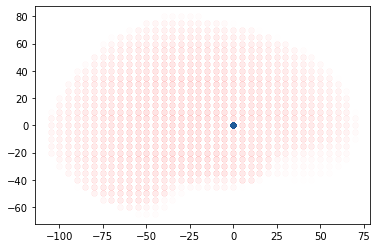

In [97]:
plt.plot(dip_pos[:,1], dip_pos[:,2], 'o', alpha=0.005)
plt.plot(dip_pos_mni[:,1], dip_pos_mni[:,2], 'ro', alpha=0.005)


In [111]:
# points_found, label_codes, label_strings = get_labels_of_points(dip_pos*1e3, atlas="aal2")
points_found, label_codes, label_strings = get_labels_of_points(dip_pos_mni, atlas="aal2")
if not np.all(points_found):
    print("Not all sources were assigned to regions.")

print(label_codes.shape)

(14629,)


In [99]:
not_found_indices = np.where(np.array(points_found) == False)

In [100]:
not_found_indices[0].shape

(0,)

In [101]:
sum(label_codes>0)

10822

In [102]:
dip_pos[np.where(label_codes>0)[0]].shape

(10822, 3)

In [103]:
np.where(label_codes>0)[0]

array([   13,    14,    15, ..., 14626, 14627, 14628])

In [104]:
np.where(label_codes==0)[0]

array([    0,     1,     2, ..., 14522, 14566, 14624])

In [105]:
8387+5849

14236

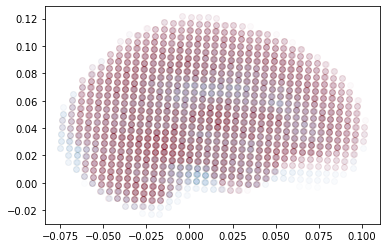

In [106]:
# plot all sources that fell into valid & non-CSF regions
plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o', alpha=0.01)
plt.plot(dip_pos[np.where(label_codes>0)[0], 1], dip_pos[np.where(label_codes>0)[0], 2], 'ro',alpha=0.01)

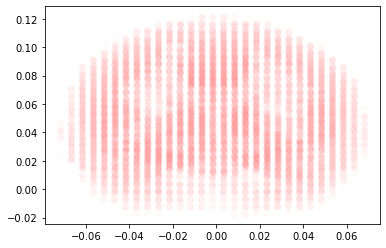

In [107]:
# plot all sources that fell into valid & non-CSF regions
#plt.plot(dip_pos[:, 0], dip_pos[:, 2], 'o', alpha=0.01)
plt.plot(dip_pos[np.where(label_codes>0)[0], 0], dip_pos[np.where(label_codes>0)[0], 2], 'ro',alpha=0.01)

ERROR:root:The atlas does not specivy valid labels for all the given points.
Total number of points: (50) out of which (33) were validly assigned.


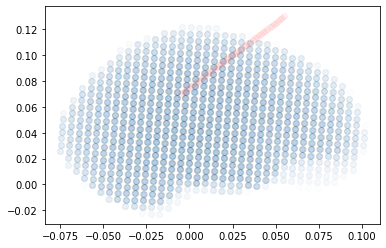

In [108]:
# e.g. coordinates -0.02, 0.025, 0.10 should have sth.
# get_labels_of_points(np.array((0.02, 0.025, 0.10)).reshape((1,3))*1e3, atlas="aal2")
center = np.array((0.02, 0.025, 0.10))#.reshape((1,3))
radius = 0.03
x = np.linspace(center[0]-radius, center[0]+radius, 50).reshape((-1,1))
y = np.linspace(center[1]-radius, center[1]+radius, 50).reshape((-1,1))
z = np.linspace(center[2]-radius, center[2]+radius, 50).reshape((-1,1))


get_labels_of_points(np.hstack((x,y,z))*1e3, atlas="aal2")

plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o', alpha=0.01)
plt.plot(y, z, 'ro', alpha=0.05)

In [109]:
x = np.linspace(-90, 90, 100)
y = np.linspace(-126, 90, 100)
z = np.linspace(-72, 108 ,100)

yy, zz = np.meshgrid(y, z)

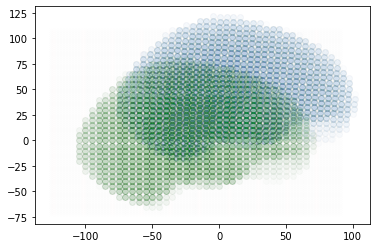

In [112]:
plt.plot(yy, zz, "x", alpha =0.005)
plt.plot(dip_pos[:, 1]*1e3, dip_pos[:, 2]*1e3, 'o', alpha=0.01)
plt.plot(dip_pos_mni[:, 1], dip_pos_mni[:, 2], 'go', alpha=0.01)

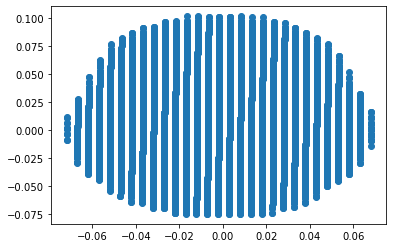

In [113]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 0], dip_pos[:, 1], 'o')
plt.plot(dip_pos[not_found_indices[0], 0], dip_pos[not_found_indices[0], 1], 'ro')

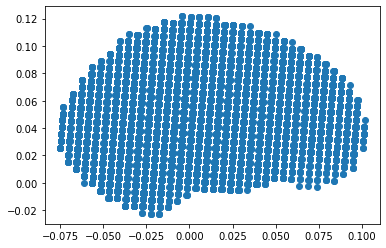

In [114]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o')
plt.plot(dip_pos[not_found_indices[0], 1], dip_pos[not_found_indices[0], 2], 'ro')

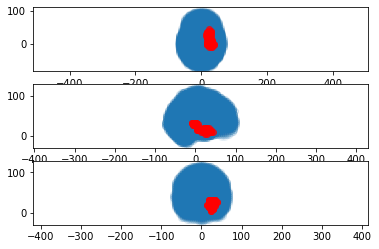

In [115]:
plot_glassbrain_projections(fwd, label_codes, 4112, "");

### Why are there three times as many columns as there are dipoles and how are the dipoles sorted?

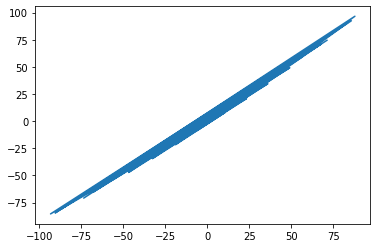

In [11]:
plt.plot(leadfield[:, 0], leadfield[:, 3])

In [21]:
print(np.dot(leadfield[:, 0], leadfield[:, 0]))
print(np.dot(leadfield[:, 0], leadfield[:, 1]))
print(np.dot(leadfield[:, 0], leadfield[:, 2]))
print(np.dot(leadfield[:, 0], leadfield[:, 3]))
print(np.dot(leadfield[:, 0], leadfield[:, 4]))

163186.72
3916.299
-1498.74
163503.4
-6487.4355


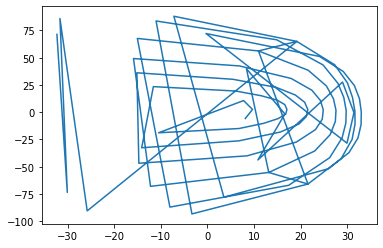

In [19]:
plt.plot(leadfield[:, 2], leadfield[:, 0])

### Assign dipoles-xyz to regions

### Test downsampling

In [125]:
np.unique(label_codes)

array([   0., 2001., 2002., 2101., 2102., 2201., 2202., 2301., 2302.,
       2311., 2312., 2321., 2322., 2331., 2332., 2401., 2402., 2501.,
       2502., 2601., 2602., 2611., 2612., 2701., 2702., 2801., 2802.,
       2811., 2812., 2821., 2822., 2831., 2832., 3001., 3002., 4001.,
       4002., 4011., 4012., 4021., 4022., 4101., 4102., 4111., 4112.,
       4201., 4202., 5001., 5002., 5011., 5012., 5021., 5022., 5101.,
       5102., 5201., 5202., 5301., 5302., 5401., 5402., 6001., 6002.,
       6101., 6102., 6201., 6202., 6211., 6212., 6221., 6222., 6301.,
       6302., 6401., 6402., 7001., 7002., 7011., 7012., 7021., 7022.,
       7101., 7102., 8101., 8102., 8111., 8112., 8121., 8122., 8201.,
       8202., 8211., 8212., 8301., 8302., 9001., 9002., 9011., 9012.,
       9021., 9022., 9031., 9032., 9041., 9042., 9051., 9052., 9061.,
       9062., 9071., 9072., 9081., 9082., 9100., 9110., 9120., 9130.,
       9140., 9150., 9160., 9170.])

In [116]:
ds_everything = downsample_leadfield_matrix(leadfield, label_codes)

In [117]:
ds_everything[2]

array([[ 84.63156128,  59.82302094, 167.70755005, ...,  38.69843292,
         43.67016602,  51.48738098],
       [ 77.67840576,  73.03544617, 155.36833191, ...,  39.51872253,
         44.86399841,  53.27131271],
       [ 62.65379715,  78.47480774, 105.01065826, ...,  38.96089935,
         44.03614807,  52.11582184],
       ...,
       [-15.40226936, -25.08542442, -17.11616135, ...,  -9.62960911,
        -17.18099976, -26.02982903],
       [-14.36262798,  -4.97132969, -14.70113277, ...,   6.93685675,
          1.19037664,  -5.42366266],
       [ -5.77040243, -10.15473557,  -7.59877443, ...,   7.15830946,
          2.06936336,  -3.80788612]])

In [118]:
print(np.min(leadfield), np.max(leadfield), np.mean(leadfield))

-696.64154 667.87744 2.6326315


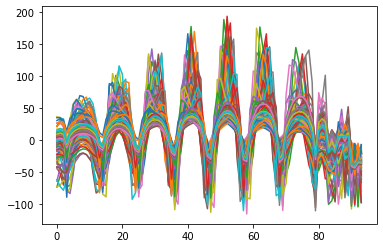

In [123]:
plt.plot(ds_everything[3])

In [44]:
# np.save("x_orientation", ds_everything[0])
# np.save("y_orientation", ds_everything[1])
# np.save("z_orientation", ds_everything[2])